In [2]:
from datasets import load_dataset

In [16]:
data = load_dataset('jamescalam/reddit-topics',split='train')
data

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['sub', 'title', 'selftext', 'upvote_ratio', 'id', 'created_utc'],
    num_rows: 3791
})

In [17]:
from bertopic import BERTopic 
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer_model = CountVectorizer(ngram_range=(1,2),stop_words="english")

In [19]:
if type(data['selftext']) is list :
    text = data['selftext']
else:
    text = data['selftext'].tolist()


In [20]:
model = BERTopic(
    vectorizer_model= vectorizer_model,
    language= 'english',
    calculate_probabilities=True,
    verbose=True
)

In [21]:
topics,probs = model.fit_transform(text)

2024-06-28 12:03:19,155 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/119 [00:00<?, ?it/s]

2024-06-28 12:03:28,487 - BERTopic - Embedding - Completed ✓
2024-06-28 12:03:28,487 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-28 12:03:49,473 - BERTopic - Dimensionality - Completed ✓
2024-06-28 12:03:49,477 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-28 12:03:49,741 - BERTopic - Cluster - Completed ✓
2024-06-28 12:03:49,750 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-28 12:03:51,102 - BERTopic - Representation - Completed ✓


In [22]:
for i in range(5):
    print(f"{topics[i]} : {data['selftext'][i]}")

1 : Please don't put any weight on these!  Its just for fun.  I made this algo myself..I don't know what I'm doing... its far more complicated than need be, and I don't even know what its doing anymore.

Now I'm just testing it for the first time...and having some fun.

|*Asset*|*Actual Price*|*Calculated Price*|*% Change*|
|:-|:-|:-|:-|
|FRLN|0.7522|0.114058535|\-85%|
|HYMC|1.43|0.921447084|\-36%|
|SQQQ|46.56|35.08529881|\-25%|
|KOLD|8.78|7.087276735|\-19%|
|MOS|65.4|55.48180539|\-15%|
|UI|277.02|245.3351418|\-11%|
|AAL|19.14|17.00989343|\-11%|
|TGT|232.7|210.6066256|\-9%|
|FLMN|6.86|6.398027457|\-7%|
|REGN|671.33|627.7051901|\-6%|
|MSFT|285.65|268.8981373|\-6%|
|CC|32.64|31.09223336|\-5%|
|BHP|68|64.93559832|\-5%|
|KMB|140.48|135.0943617|\-4%|
|ARCC|20.85|20.08539081|\-4%|
|PFE|49.86|48.10944975|\-4%|
|MAS|54.7|52.88982538|\-3%|
|GGB|5.63|5.450538112|\-3%|
|V|216|209.8209104|\-3%|
|TWTR|48.79|47.50760913|\-3%|
|TSLA|896|875.6372586|\-2%|
|STAG|39.71|38.80885253|\-2%|
|ITOT|93.92|93.0

In [23]:
freq = model.get_topic_info()
freq.head()

,Topic,Count,Name,Representation,Representative_Docs
0,0,2167,0_model_im_python_data,"[model, im, python, data, using, use, like, am...","[Hi, I am facing a problem when I try to compu..."
1,1,893,1_market_stock_im_like,"[market, stock, im, like, stocks, just, compan...",[I work in the biotech field and want to lay o...
2,2,640,2_nan nan_nan__,"[nan nan, nan, , , , , , , , ]","[nan, nan, nan]"
3,3,63,3_financial_relevant_include_consider,"[financial, relevant, include, consider, usefu...",[Have a general question? Want to offer some ...
4,4,15,4_nan_nan nan__,"[nan, nan nan, , , , , , , , ]","[nan, nan, nan]"


In [26]:
model.visualize_hierarchy()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.00000000e+00, 1.51874983e-05, 1.51874983e-05, 0.00000000e+00]),
              'xaxis': 'x',
              'y': array([-15., -15., -25., -25.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(61,153,112)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.00000000e+00, 7.79893918e-04, 7.79893918e-04, 1.51874983e-05]),
              'xaxis': 'x',
              'y': array([ -5.,  -5., -20., -20.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.        , 0.60786273, 0.60786273, 0.        ]),
              'xaxis': 'x',
              'y': array([-35., -35., -45., -45.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(255,65,54)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([0.60786273, 0.94900267, 0.94900267, 0.        ]),
              'xaxis': 'x',
              'y': array([-40., -40., -55., -55.]),
              'yaxis': 'y'},
             {'hoverinfo': 'text',
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([7.79893918e-04, 1.53673073e+00, 1.53673073e+00, 9.49002671e-01]),
              'xaxis': 'x',
              'y': array([-12.5, -12.5, -47.5, -47.5]),
              'yaxis': 'y'}],
    'layout': {'autosize': False,
               'height': 290,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'hovermode': 'closest',
               'plot_bgcolor': '#ECEFF1',
               'showlegend': False,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Hierarchical Clustering</b>',
                         'x': 0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
               'width': 1000,
               'xaxis': {'mirror': 'allticks',
                         'rangemode': 'tozero',
                         'showgrid': False,
                         'showline': True,
                         'showticklabels': True,
                         'ticks': 'outside',
                         'type': 'linear',
                         'zeroline': False},
               'yaxis': {'mirror': 'allticks',
                         'range': [-60.0, 0.0],
                         'rangemode': 'tozero',
                         'showgrid': False,
                         'showline': True,
                         'showticklabels': True,
                         'tickmode': 'array',
                         'ticks': 'outside',
                         'ticktext': [2_nan nan_nan_, 4_nan_nan nan_, 5_nan_nan
                                      nan_, 0_model_im_python, 1_market_stock_im,
                                      3_financial_relevant_include],
                         'tickvals': [-5.0, -15.0, -25.0, -35.0, -45.0, -55.0],
                         'type': 'linear',
                         'zeroline': False}}
})

In [27]:
model.visualize_topics()

c:\Users\dhanu\.conda\envs\llm\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'model | im | python | data | using', 2167],
                                   [1, 'market | stock | im | like | stocks', 893],
                                   [2, 'nan nan | nan |  |  | ', 640],
                                   [3, 'financial | relevant | include | consider | useful', 63],
                                   [4, 'nan | nan nan |  |  | ', 15],
                                   [5, 'nan | nan nan |  |  | ', 13]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([2167,  893,  640,   63,   15,   13], dtype=int64),
                         'sizemode': 'area',
                         'sizeref': 1.354375,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([11.488359, 11.332506, 12.258954, 10.942899, 12.706461, 11.884675],
                         dtype=float32),
              'xaxis': 'x',
              'y': array([16.993528 , 17.804405 , -3.9924936, 17.282156 , -3.5579126, -4.3820815],
                         dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': 9.301463937759399,
                                'y': 7.7178361296653755,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 11.956947016716004,
                                'xshift': 10,
                                'y': 20.475065994262696}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': 11.956947016716004,
                           'x1': 11.956947016716004,
                           'y0': -5.039393734931946,
                           'y1': 20.475065994262696},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': 9.301463937759399,
                           'x1': 14.612430095672607,
                           'y0': 7.7178361296653755,
                           'y1': 7.7178361296653755}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5']]}],
                                       'label': 'Topic 0',
                                       'method': 'update'},
                                      {'args': [{'marker.color': [['#B0BEC5',
                                                                  'red', '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5']]}],
                                       'label': 

In [30]:
model.visualize_barchart()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.013307450970556042, 0.013611158557887455,
                    0.013771814347816906, 0.014166086979394052,
                    0.017395142649080257],
              'xaxis': 'x',
              'y': [using  , data  , python  , im  , model  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.012906589123776723, 0.012971089285643332,
                    0.013650012292373078, 0.014747260634639972,
                    0.017628534071261002],
              'xaxis': 'x2',
              'y': [stocks  , like  , im  , stock  , market  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [1e-05, 1e-05, 1e-05, 2.3108434635685184, 2.317539967837763],
              'xaxis': 'x3',
              'y': [  ,   ,   , nan  , nan nan  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.056058295775648685, 0.058455909214699675,
                    0.05862737331563502, 0.058979650319231074, 0.07995407833994383],
              'xaxis': 'x4',
              'y': [useful  , consider  , include  , relevant  , financial  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [1e-05, 1e-05, 1e-05, 2.2393756766554955, 2.3886601211509713],
              'xaxis': 'x5',
              'y': [  ,   ,   , nan nan  , nan  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [1e-05, 1e-05, 1e-05, 2.2265792442174637, 2.4013996417971097],
              'xaxis': 'x6',
              'y': [  ,   ,   , nan nan  , nan  ],
              'yaxis': 'y6'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 1',
                                'x': 0.36250000000000004,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 2',
                                'x': 0.6375000000000001,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 3',
                                'x': 0.9125,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
              

# BERTopic  
# Umap -> 2/3D vectors -> we can visualize the Umap -> HDBSCAN (Identify the clusters in the data) -> CTF-IDF (modification of TF -IDF -Identify particular words that are relevant to particular sentence or cluster) -> 

In [31]:
data = load_dataset("jamescalam/reddit-topics",split='train',revision='c14d532')

data

Dataset({
    features: ['sub', 'title', 'selftext', 'upvote_ratio', 'id', 'created_utc'],
    num_rows: 3791
})

In [32]:
data = data.filter(lambda x: True if len(x['selftext']) > 30 else 0)

Filter:   0%|          | 0/3791 [00:00<?, ? examples/s]

In [33]:
data

Dataset({
    features: ['sub', 'title', 'selftext', 'upvote_ratio', 'id', 'created_utc'],
    num_rows: 3118
})

In [38]:
n = len(data)
n

3118

In [34]:
# Embeddings 

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [35]:
import numpy as np 
from tqdm.auto import tqdm

In [39]:
batch_size =16

embeds = np.zeros((n,model.get_sentence_embedding_dimension()))

In [42]:
embeds

array([[-0.04073308,  0.02266831, -0.0384087 , ..., -0.06260677,
        -0.1062992 ,  0.00869166],
       [-0.02437843, -0.00837498, -0.04717101, ..., -0.04677142,
        -0.00019814, -0.02148015],
       [-0.02720447, -0.02602532,  0.06478765, ..., -0.12095294,
        -0.00200373,  0.0570289 ],
       ...,
       [-0.01755178,  0.04197686, -0.00476731, ..., -0.00231357,
         0.05223944, -0.00686337],
       [-0.03335299, -0.08844151,  0.03830536, ...,  0.02206938,
        -0.06987049,  0.00297897],
       [ 0.06622674, -0.00114542, -0.04051112, ...,  0.01069624,
         0.02640617, -0.02664739]])

In [40]:
for i in tqdm(range(0,n,batch_size)):
    i_end = min(i+batch_size,n)
    batch = data['selftext'][i:i_end]
    batch_embed = model.encode(batch)
    embeds[i:i_end] = batch_embed

  0%|          | 0/195 [00:00<?, ?it/s]

In [43]:
#UMAP Dimensionality Reduction

set(data['sub'][:n])




{'LanguageTechnology', 'Python', 'investing', 'pytorch'}

In [44]:
colors = data['sub'][:n]

In [ ]:
colors

In [52]:
import umap

fit = umap.UMAP()

u = fit.fit_transform(embeds)

#n_neighbors 


In [53]:
import plotly.express as px 

fit = umap.UMAP(n_components=3,n_neighbors=3,min_dist=0.05)

u = fit.fit_transform(embeds)

fig = px.scatter_3d(
    x=u[:,0],y = u[:,1], z=u[:,2],
    color = colors,
    custom_data = [data['sub'][:n], data['title'][:n]]
)

fig.update_traces(hovertemplate="<br>".join(["sub: %{customdata[1]}",
                                             "title: %{customdata[2]}"]))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['investing',
                                    "Followup- Here are the results so far from my algo's price calculations on the symbols you gave me:"],
                                   ['investing',
                                    'This 2 hr Mohnish Pabrai lecture is better than 90% of my Ivy League Investing Classes'],
                                   ['investing',
                                    'Vital Energy $VUX has “more than doubled production” but the market hasn’t noticed this yet – it was not yet in financials. Easy cashflow, more growth potential and a future stock multibagger using Q4 2021 numbers financials and 900 BOE/D production + higher oil prices of $100 WTI today'],
                                   ...,
                                   ['investing',
                                    'Does it make sense to invest in Ukrainian bonds right now, assuming one waits until maturity?'],
                                   ['investing', 'TIL my long-term capital gains are taxed at 0%'],
                                   ['investing',
                                    'Investing Opportunity? Russia Ruble is now worth about $.01 US.']],
                                  dtype=object),
              'hovertemplate': 'sub: %{customdata[1]}<br>title: %{customdata[2]}',
              'legendgroup': 'investing',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'investing',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([9.055956 , 9.496309 , 7.3872933, ..., 7.1308765, 6.866107 , 9.184498 ],
                         dtype=float32),
              'y': array([-0.8168407 , -0.80501646, -2.082269  , ..., -2.7118142 ,  1.1300788 ,
                          -3.563779  ], dtype=float32),
              'z': array([5.6808743, 5.6331806, 7.280956 , ..., 6.112384 , 2.3587844, 6.574267 ],
                         dtype=float32)},
             {'customdata': array([['pytorch', 'How to get torch==1.1.0 in an Anaconda env (Windows)'],
                                   ['pytorch', 'GroupNorm3D'],
                                   ['pytorch', 'How to find a memory leak?'],
                                   ...,
                                   ['pytorch', 'A trick for training on large batches'],
                                   ['pytorch',
                                    'Microsoft Joined pytorch, What about our privacy? GNU when?'],
                                   ['pytorch', 'Pytorch vs tensorflow for job opurtunities/freelancing']],
                                  dtype=object),
              'hovertemplate': 'sub: %{customdata[1]}<br>title: %{customdata[2]}',
              'legendgroup': 'pytorch',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'pytorch',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([10.513986 ,  6.862376 ,  9.269406 , ...,  9.5556135,  8.819143 ,
                           8.91304  ], dtype=float32),
              'y': array([12.099294, 11.386411, 11.913455, ..., 10.565074, 10.071174, 11.143193],
                         dtype=float32),
              'z': array([4.808729 , 4.7427053, 5.7603908, ..., 3.4681597, 6.2457843, 6.232984 ],
                         dtype=float32)},
             {'customdata': array([['Python', 'Let the computer test your Python GUI application'],
                                   ['Python', 'Can i call myself a junior? What to do next?'],
                                   ['Python', 'I would like to increase my python kills.'],
                                   ...,
                                   ['Python',
                                    '*UPDATED* Random numbers generator list with Mean, Median, Mode 

In [54]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)


HDBSCAN()

<Axes: ylabel='$\\lambda$ value'>

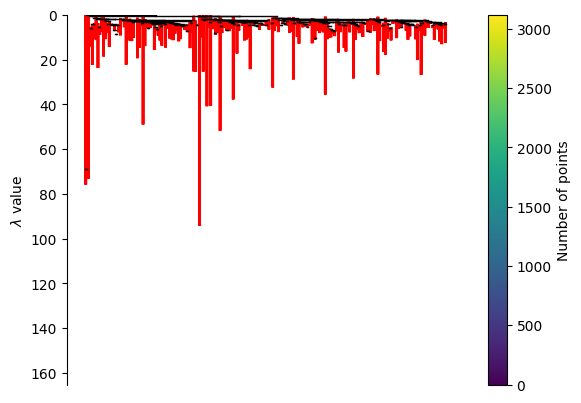

In [55]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [56]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=80)

clusterer.fit(u)

HDBSCAN(min_cluster_size=80)

<Axes: ylabel='$\\lambda$ value'>

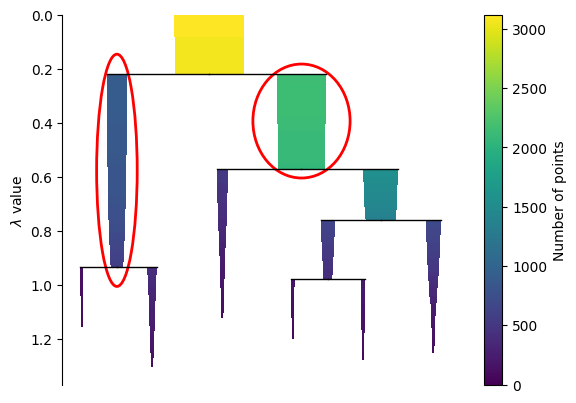

In [57]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [58]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80,min_samples=40
)
clusterer.fit(u)

HDBSCAN(min_cluster_size=80, min_samples=40)

<Axes: ylabel='$\\lambda$ value'>

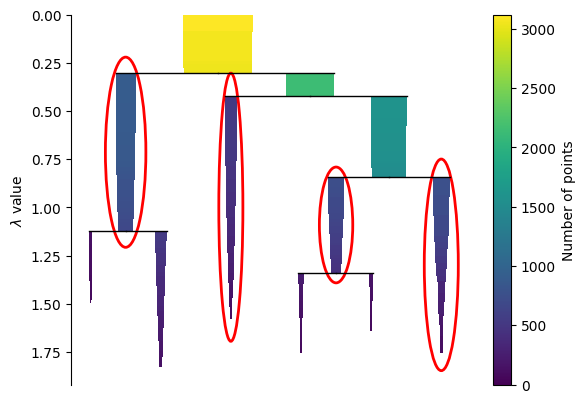

In [59]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [60]:
#Findind the topics with ctf-idf 

classes = {}
for label in set(clusterer.labels_):
    classes[label] = {
        'vocab' : set(),
        'tokens' :[],
        'tfidf_array' : None
    }

classes

{0: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 1: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 2: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 3: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 -1: {'vocab': set(), 'tokens': [], 'tfidf_array': None}}